In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)             
pd.set_option('display.max_columns', None)  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Dataset\Onlinefood\onlinefoods.csv")

In [3]:
df=df.drop('Unnamed: 12',axis=1)
df=df.drop('latitude',axis=1)
df=df.drop('longitude',axis=1)

In [4]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,560010,Yes,Positive


In [5]:
df.tail()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Pin code,Output,Feedback
383,23,Female,Single,Student,No Income,Post Graduate,2,560001,Yes,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,560048,Yes,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,560010,Yes,Positive
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,560009,Yes,Positive
387,23,Male,Single,Student,No Income,Post Graduate,5,560078,Yes,Positive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         388 non-null    int64 
 1   Gender                      388 non-null    object
 2   Marital Status              388 non-null    object
 3   Occupation                  388 non-null    object
 4   Monthly Income              388 non-null    object
 5   Educational Qualifications  388 non-null    object
 6   Family size                 388 non-null    int64 
 7   Pin code                    388 non-null    int64 
 8   Output                      388 non-null    object
 9   Feedback                    388 non-null    object
dtypes: int64(3), object(7)
memory usage: 30.4+ KB


In [7]:
df.shape

(388, 10)

In [8]:
df.size

3880

In [9]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Pin code', 'Output',
       'Feedback'],
      dtype='object')

In [10]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

In [11]:
df.duplicated().sum()

103

In [12]:
df=df.drop_duplicates()

In [13]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,560010,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...
355,21,Male,Single,Student,No Income,Graduate,2,560046,No,Positive
363,31,Male,Married,Employee,More than 50000,Ph.D,3,560085,Yes,Positive
369,30,Male,Married,Employee,More than 50000,Post Graduate,6,560095,Yes,Positive
374,21,Male,Single,Student,No Income,Graduate,3,560092,Yes,Negative


In [14]:
df.shape

(285, 10)

**Seperate The columns in numerical And Categorical**

In [15]:
cat=df.select_dtypes(include='object').columns
num=df.select_dtypes(exclude='object').columns

In [16]:
print('cat:',cat)
print('num:',num)

cat: Index(['Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Output', 'Feedback'],
      dtype='object')
num: Index(['Age', 'Family size', 'Pin code'], dtype='object')


**Categorical Analysis**

In [17]:
for i in cat:
    a=df[i].unique()
    print(i,a)

Gender ['Female' 'Male']
Marital Status ['Single' 'Married' 'Prefer not to say']
Occupation ['Student' 'Employee' 'Self Employeed' 'House wife']
Monthly Income ['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
Educational Qualifications ['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']
Output ['Yes' 'No']
Feedback ['Positive' 'Negative ']


In [18]:
for i in cat:
    a=df[i].nunique()
    print(i,a)

Gender 2
Marital Status 3
Occupation 4
Monthly Income 5
Educational Qualifications 5
Output 2
Feedback 2


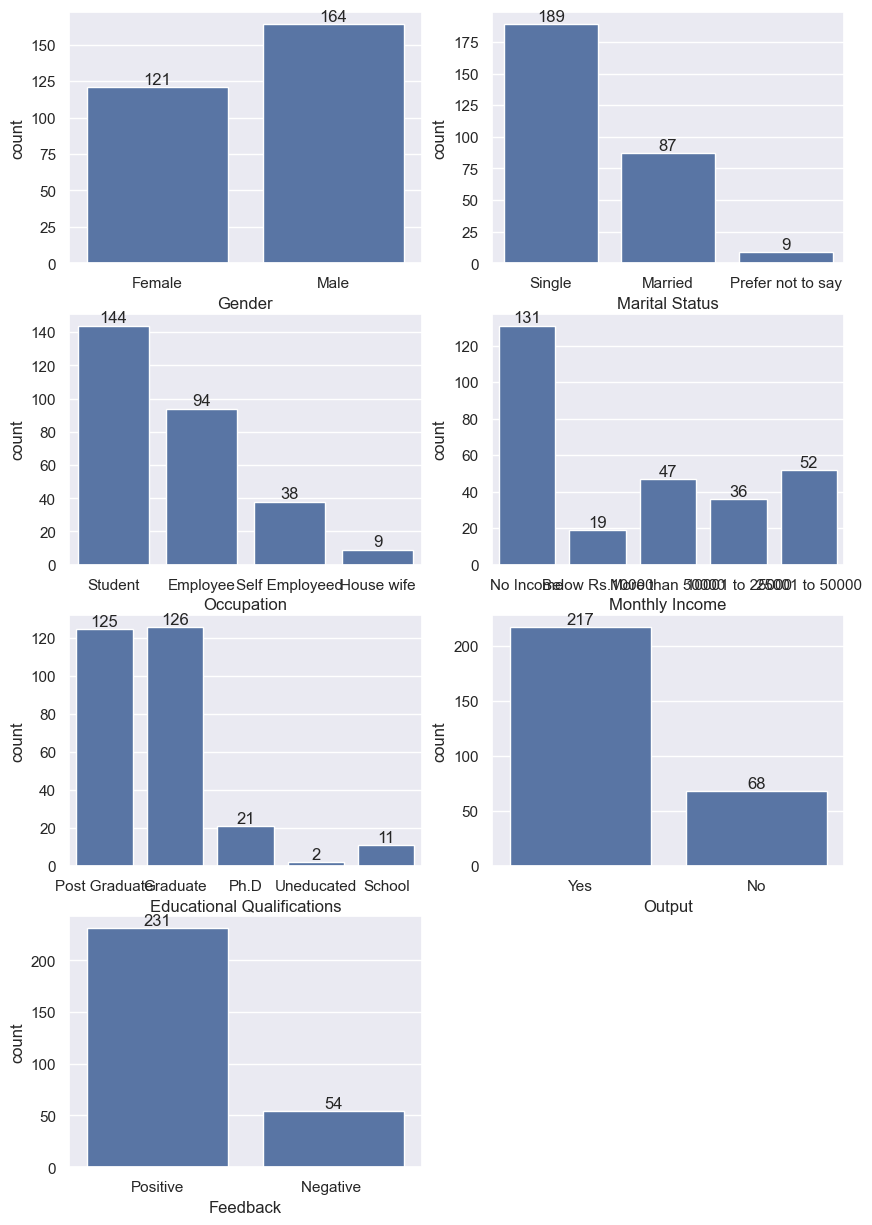

In [19]:
plt.figure(figsize=(10, 15))

for i, column in enumerate(cat):
    plt.subplot(4, 2, i + 1)

    ax = sns.countplot(data=df, x=column)
    
    ax.set_xticks(ax.get_xticks())

    
    ax.bar_label(ax.containers[0])

plt.show()


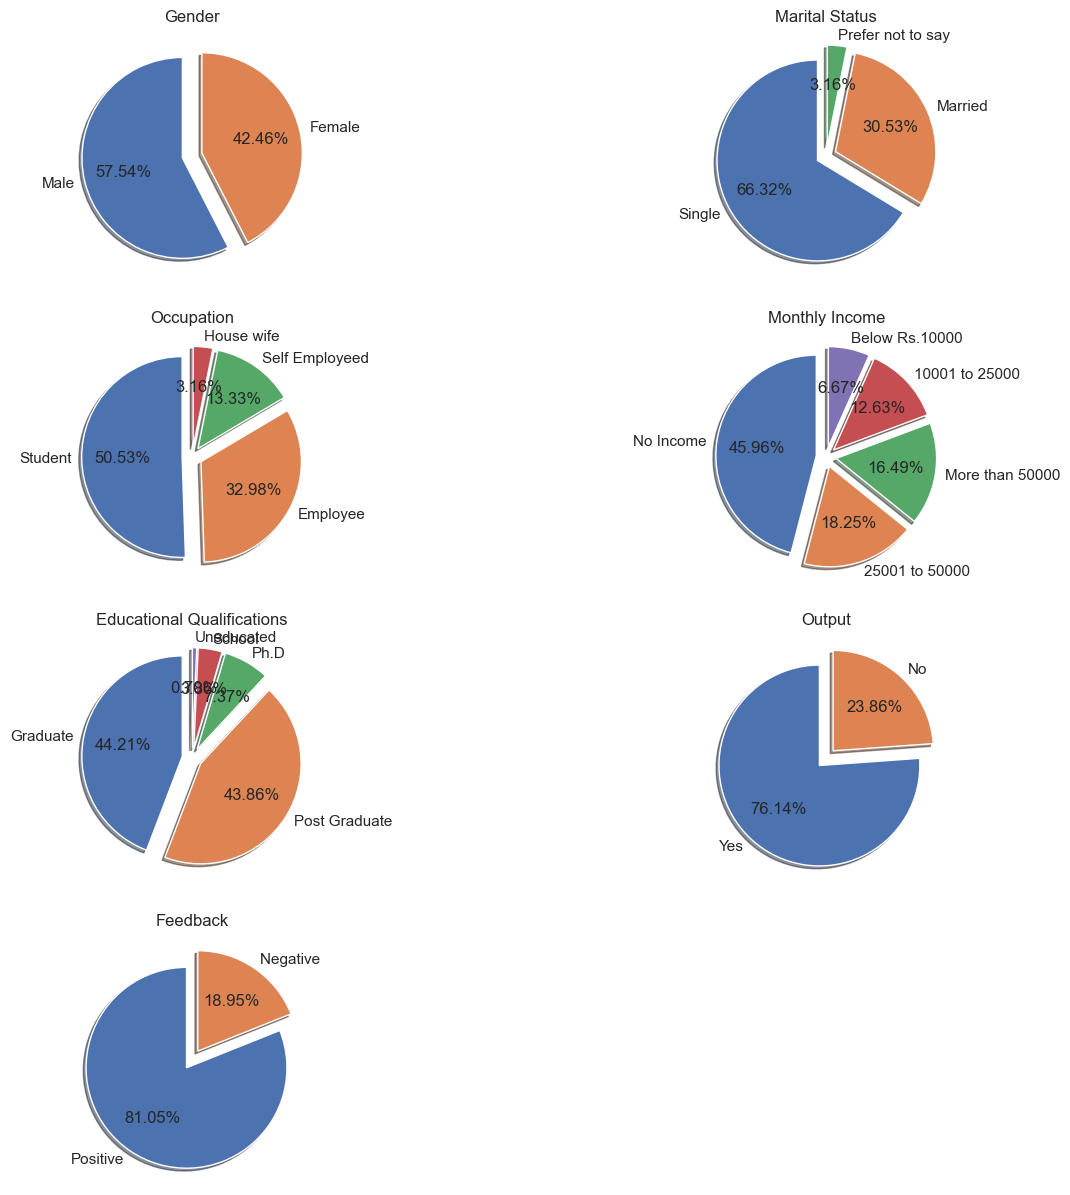

In [20]:
plt.figure(figsize=(15,15))
for i,column in enumerate(cat):
    plt.subplot(4,2,i+1)
    df[column].value_counts()
    Property=df[column].value_counts(normalize=True).keys()
    count=df[column].value_counts(normalize=True).values
    Data=pd.DataFrame(zip(Property,count),columns=[column,'Count'])
    n=df[column].nunique()
    l=[0.1 for i in range(n)]
    plt.title(column)
    plt.pie(x=count,labels=Property,autopct='%0.2f%%',shadow=True,radius=1,startangle=90,explode=l)
plt.show()

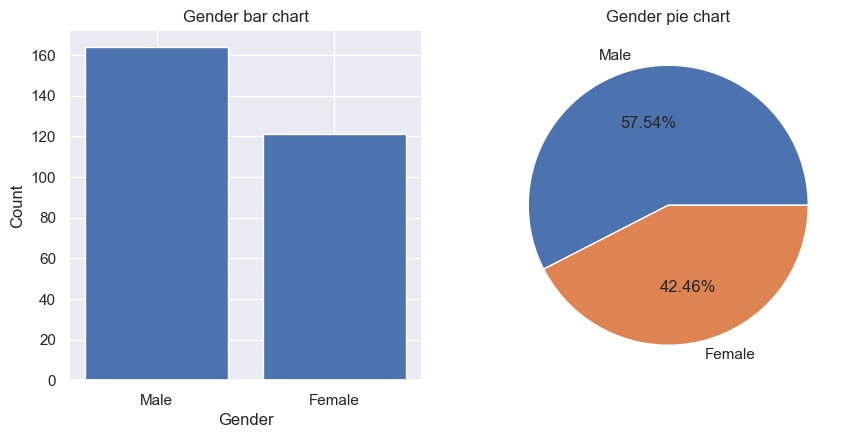

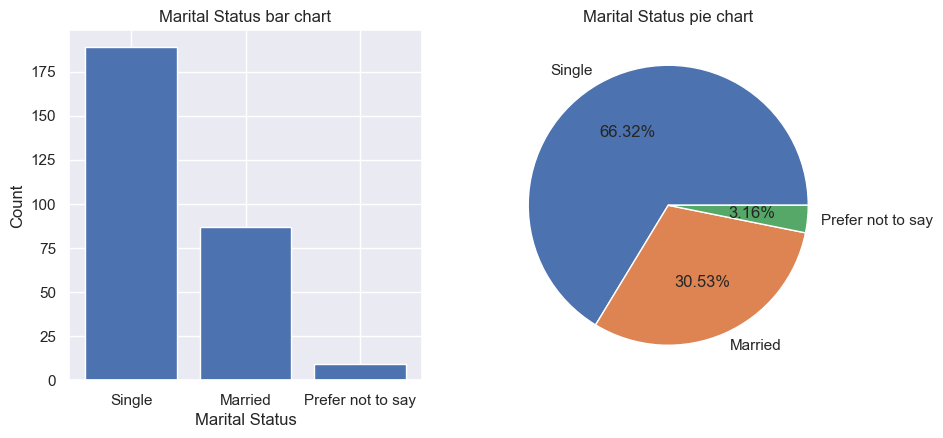

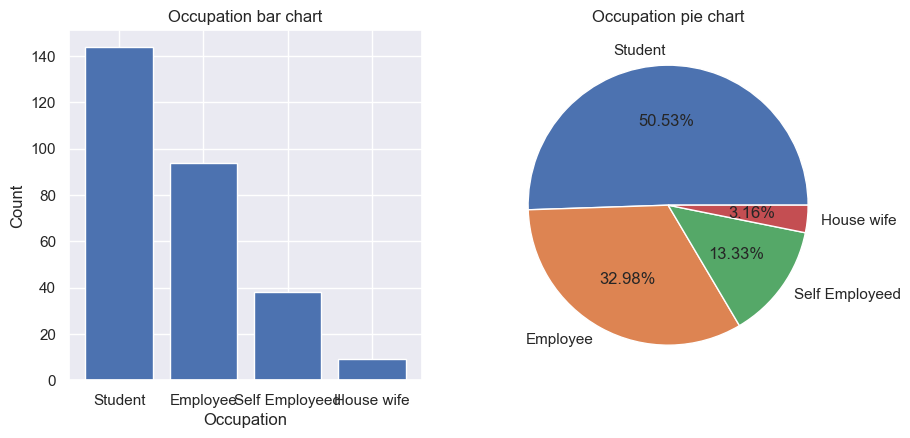

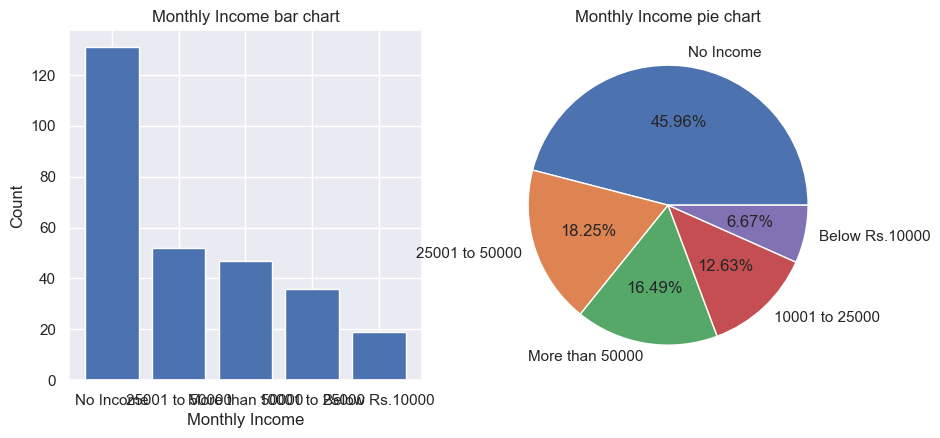

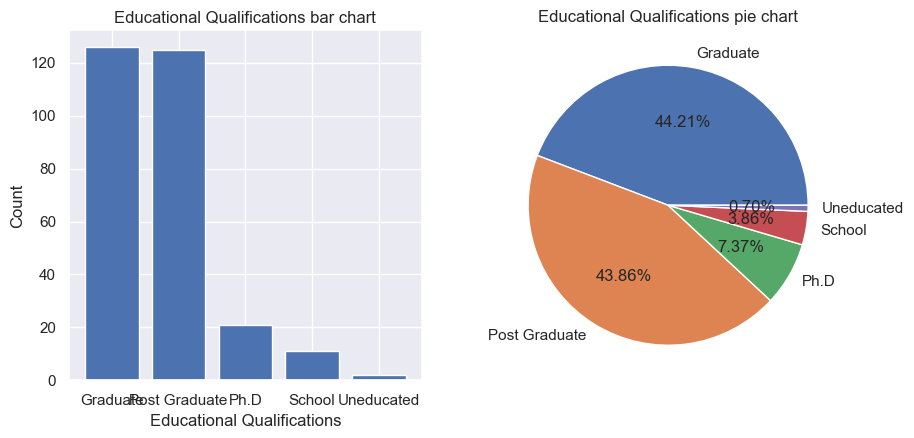

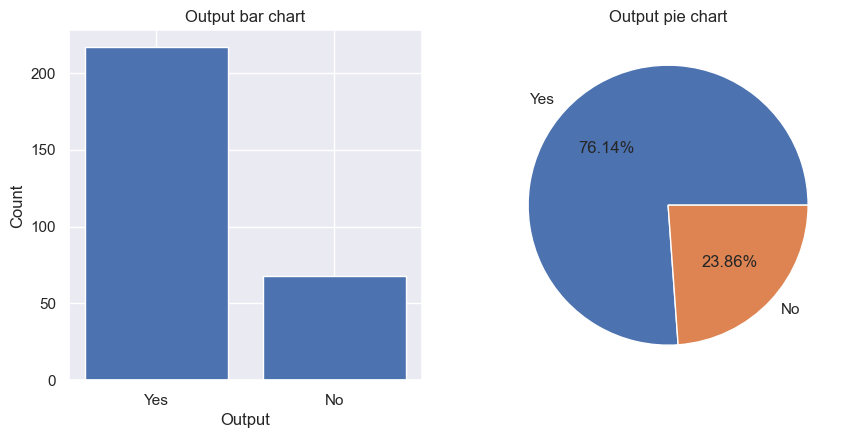

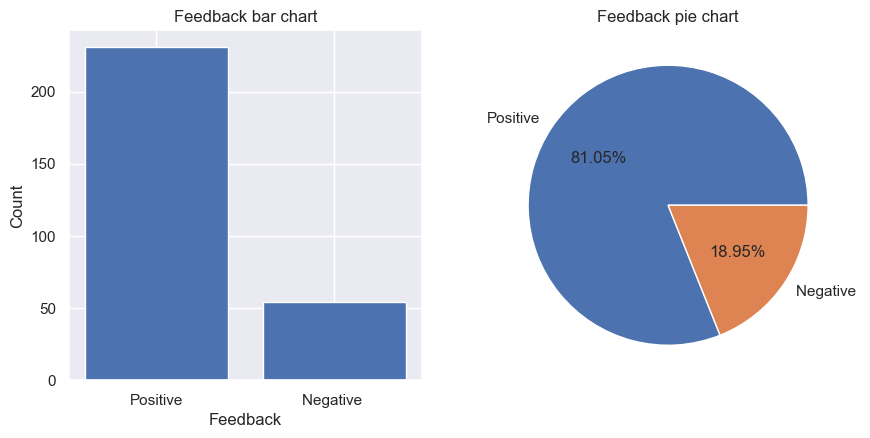

In [21]:
for column in cat:
    
    df[column].value_counts()
    Property=df[column].value_counts().keys()
    count=df[column].value_counts().values
    Data=pd.DataFrame(zip(Property,count),columns=[column,'Count'])
    Data
    
    plt.figure(figsize=(10,10))
    
    plt.subplot(2,2,1)
    plt.title(f'{column} bar chart')
    plt.bar(column,'Count',data=Data)
    
    plt.xlabel(column)
    plt.ylabel('Count')
    
   
    plt.subplot(2,2,2)
    plt.title(f'{column} pie chart')
    plt.pie(x=count,labels=Property,autopct='%0.2f%%')
    
    plt.show()

In [22]:
cat

Index(['Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Output', 'Feedback'],
      dtype='object')

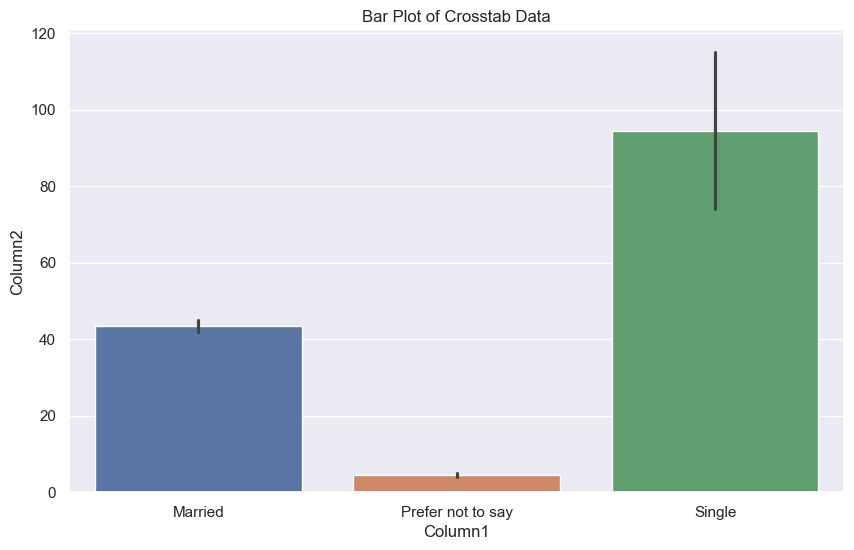

In [23]:
col1=df['Gender']
col2=df['Marital Status']
res=pd.crosstab(col1,col2)
plt.figure(figsize=(10, 6))
sns.barplot(data=res)

# Optional: Customize the plot as needed
plt.title('Bar Plot of Crosstab Data')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()

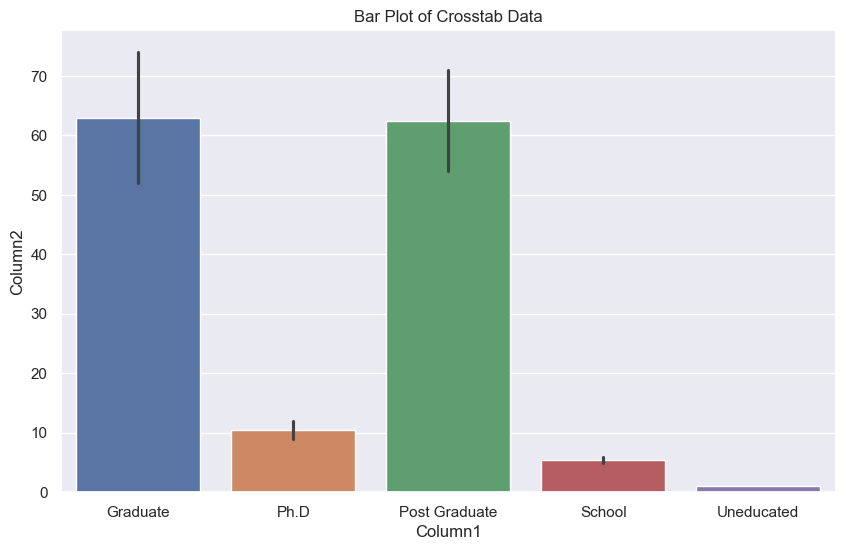

In [24]:
col1=df['Gender']
col2=df['Educational Qualifications']
res=pd.crosstab(col1,col2)
plt.figure(figsize=(10, 6))
sns.barplot(data=res)

# Optional: Customize the plot as needed
plt.title('Bar Plot of Crosstab Data')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()

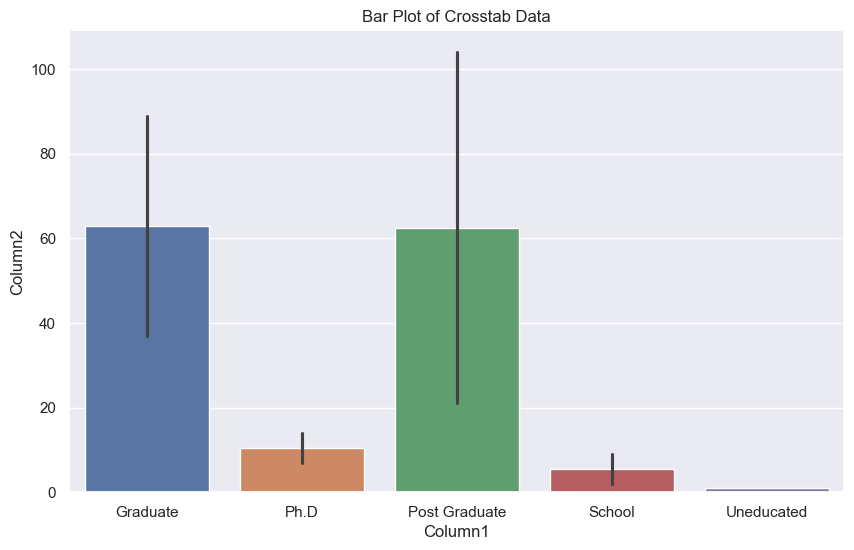

In [25]:
col1=df['Output']
col2=df['Educational Qualifications']
res=pd.crosstab(col1,col2)
plt.figure(figsize=(10, 6))
sns.barplot(data=res)

# Optional: Customize the plot as needed
plt.title('Bar Plot of Crosstab Data')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()

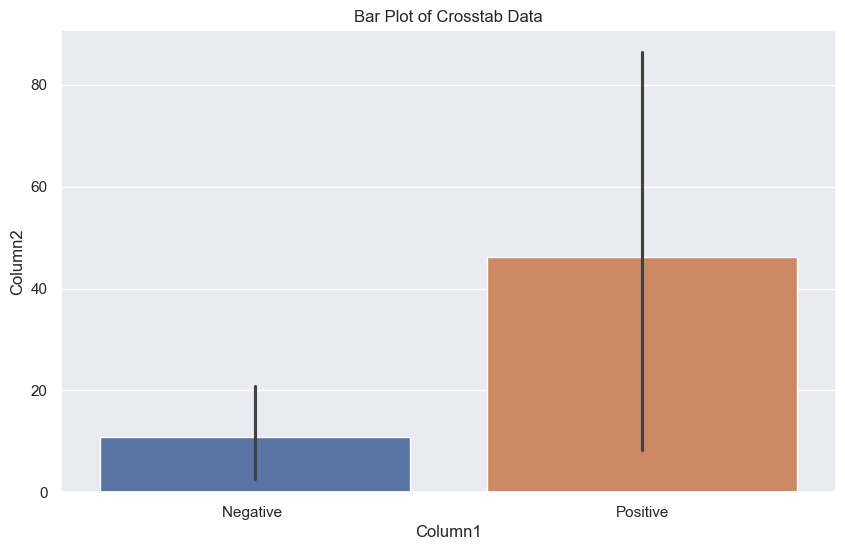

In [26]:
col1=df['Educational Qualifications']
col2=df['Feedback']
res=pd.crosstab(col1,col2)
plt.figure(figsize=(10, 6))
sns.barplot(data=res)

# Optional: Customize the plot as needed
plt.title('Bar Plot of Crosstab Data')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()

In [27]:
for i in num:
    a=df[i].skew()
    print(i,a)

Age 0.7430766506943454
Family size 0.43711233822269807
Pin code 0.7191014087140697


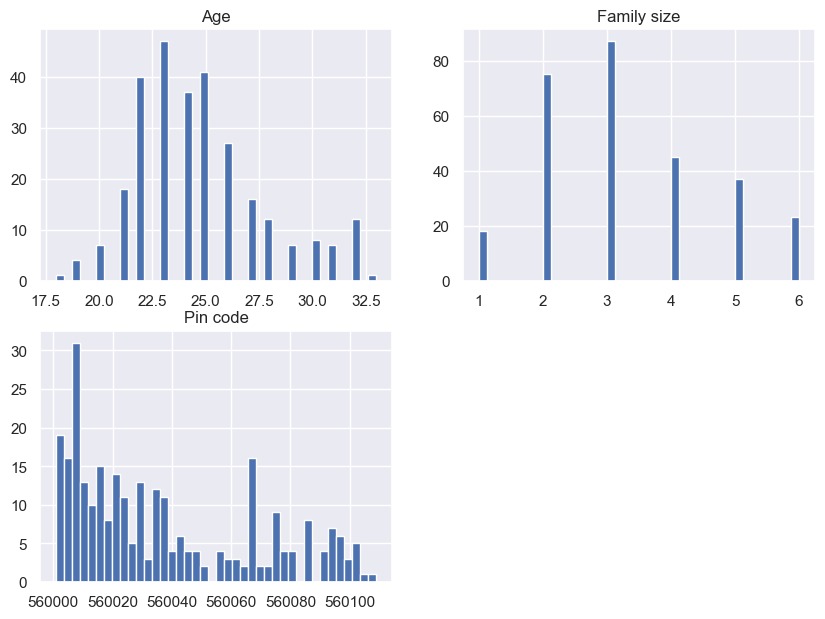

In [28]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(4,2,i+1)
    plt.title(column)
    plt.hist(df[column],bins=40)
plt.show()

In [29]:
df.describe()

,Age,Family size,Pin code
count,285.000000,285.000000,285.000000
mean,24.677193,3.270175,560037.280702
std,3.040977,1.361178,30.738306
min,18.000000,1.000000,560001.000000
25%,23.000000,2.000000,560010.000000
50%,24.000000,3.000000,560028.000000
75%,26.000000,4.000000,560066.000000
max,33.000000,6.000000,560109.000000


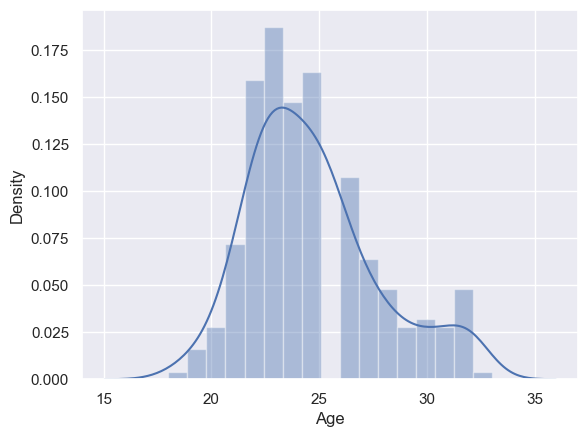

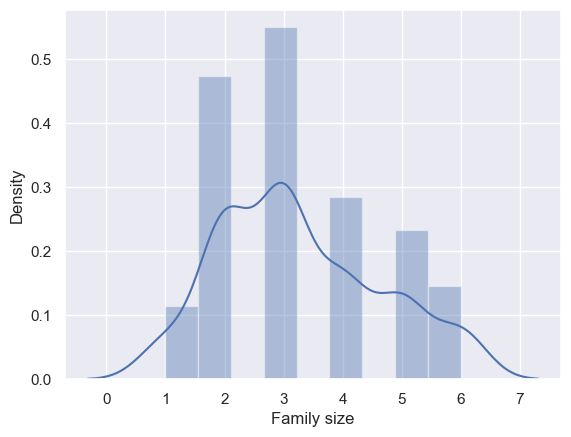

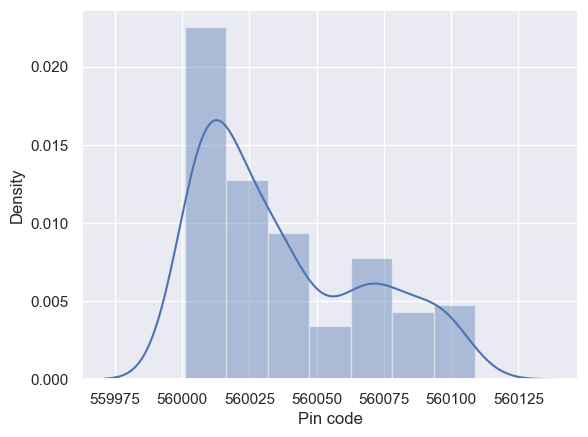

In [30]:
for i in num:
    sns.distplot(df[i])
    plt.show()

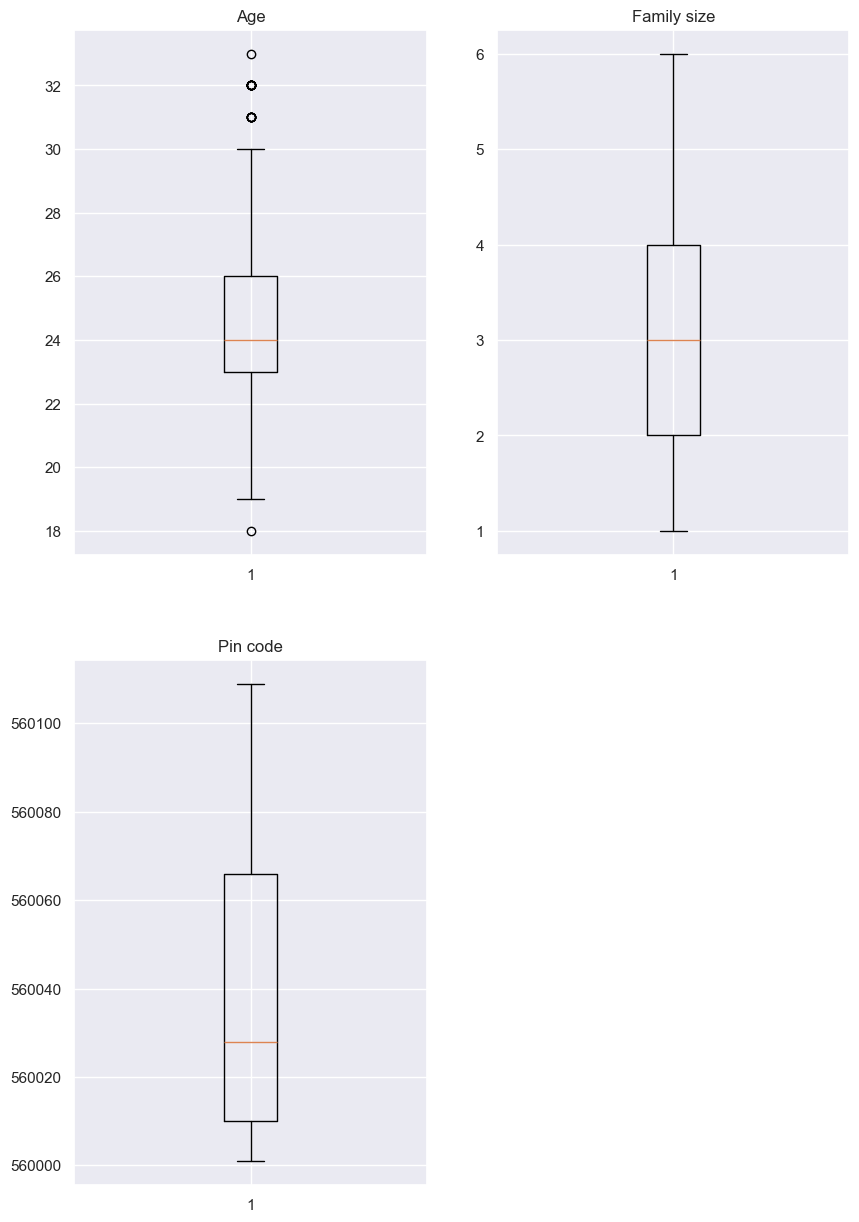

In [31]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(2,2,i+1)
    plt.title(column)
    plt.boxplot(df[column])
plt.show()

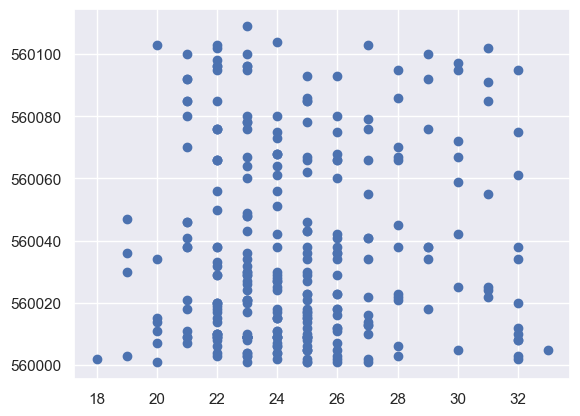

In [32]:
plt.scatter(df['Age'],df['Pin code'])

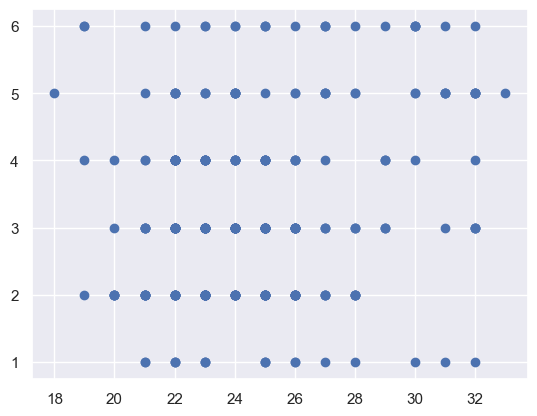

In [33]:
plt.scatter(df['Age'],df['Family size'])

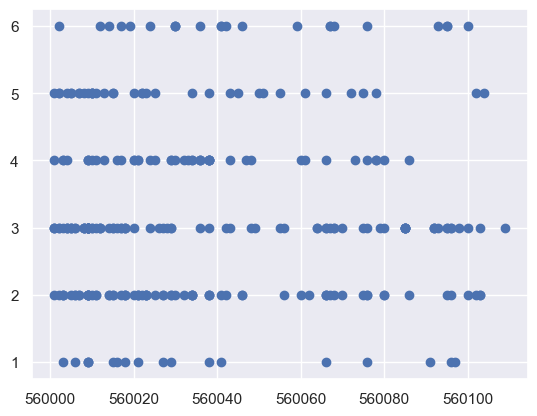

In [34]:
plt.scatter(df['Pin code'],df['Family size'])

In [35]:
corr=df.corr(numeric_only=True)
corr


,Age,Family size,Pin code
Age,1.000000,0.212541,0.051374
Family size,0.212541,1.000000,0.015686
Pin code,0.051374,0.015686,1.000000


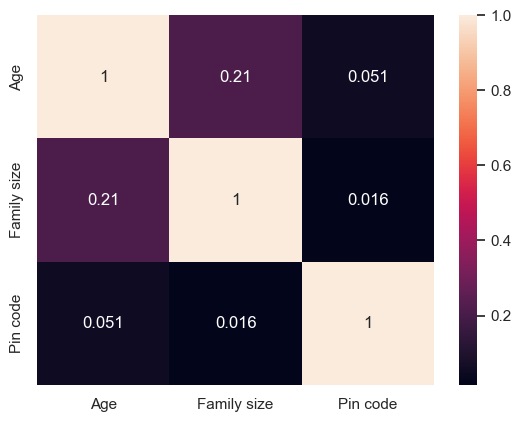

In [36]:
sns.heatmap(corr,annot=True)
plt.show()

In [37]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Marital Status"] = df["Marital Status"].map({"Married": 2, 
                                                     "Single": 1, 
                                                     "Prefer not to say": 0})
df["Occupation"] = df["Occupation"].map({"Student": 1, 
                                             "Employee": 2, 
                                             "Self Employeed": 3, 
                                             "House wife": 4})
df["Educational Qualifications"] = df["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4, 
                                                                             "Uneducated": 5})
df["Monthly Income"] = df["Monthly Income"].map({"No Income": 0, 
                                                     "25001 to 50000": 5000, 
                                                     "More than 50000": 7000, 
                                                     "10001 to 25000": 25000, 
                                                     "Below Rs.10000": 10000})
df["Feedback"] = df["Feedback"].map({"Positive": 1, "Negative ": 0})
df["Output"] = df["Output"].map({"Yes": 1, "No": 0})

print(df.head())

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               1           1               0   
1   24       0               1           1           10000   
2   22       1               1           1           10000   
3   22       0               1           1               0   
4   22       1               1           1           10000   

   Educational Qualifications  Family size  Pin code  Output  Feedback  
0                           2            4    560001       1         1  
1                           1            3    560009       1         1  
2                           2            3    560017       1         0  
3                           1            6    560019       1         1  
4                           2            4    560010       1         1  


In [38]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Pin code,Output,Feedback
0,20,0,1,1,0,2,4,560001,1,1
1,24,0,1,1,10000,1,3,560009,1,1
2,22,1,1,1,10000,2,3,560017,1,0
3,22,0,1,1,0,1,6,560019,1,1
4,22,1,1,1,10000,2,4,560010,1,1
...,...,...,...,...,...,...,...,...,...,...
355,21,1,1,1,0,1,2,560046,0,1
363,31,1,2,2,7000,3,3,560085,1,1
369,30,1,2,2,7000,2,6,560095,1,1
374,21,1,1,1,0,1,3,560092,1,0


**Oneline Food Order Prediction Model**

In [39]:
from sklearn.model_selection import train_test_split
X=np.array(df[["Age", "Gender", "Marital Status", "Occupation", 
                   "Monthly Income", "Educational Qualifications", 
                   "Family size", "Pin code", "Feedback"]])
y=np.array(df[['Output']])

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [41]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(285, 10)
(228, 9)
(57, 9)
(228, 1)
(57, 1)


**Decision Tree **

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

**prediction**

In [43]:
y_pred_dt=dtree.predict(X_test)

**Metrices**

In [44]:
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Pin code,Output,Feedback
0,20,0,1,1,0,2,4,560001,1,1
1,24,0,1,1,10000,1,3,560009,1,1
2,22,1,1,1,10000,2,3,560017,1,0
3,22,0,1,1,0,1,6,560019,1,1
4,22,1,1,1,10000,2,4,560010,1,1
...,...,...,...,...,...,...,...,...,...,...
355,21,1,1,1,0,1,2,560046,0,1
363,31,1,2,2,7000,3,3,560085,1,1
369,30,1,2,2,7000,2,6,560095,1,1
374,21,1,1,1,0,1,3,560092,1,0


In [46]:
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)
print(classification_report(y_test,y_pred_dt))

accuray is: 82.46
F1 is: 0.86
Precision is: 0.89
Recall is: 0.84
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        19
           1       0.89      0.84      0.86        38

    accuracy                           0.82        57
   macro avg       0.80      0.82      0.81        57
weighted avg       0.83      0.82      0.83        57



**Confusion Metrix**

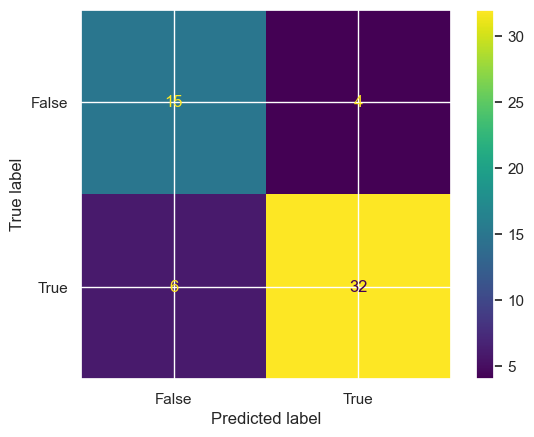

In [47]:
cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [48]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 15
False postive: 4
False negative: 6
True postive: 32


**ROC-AUC Curve**

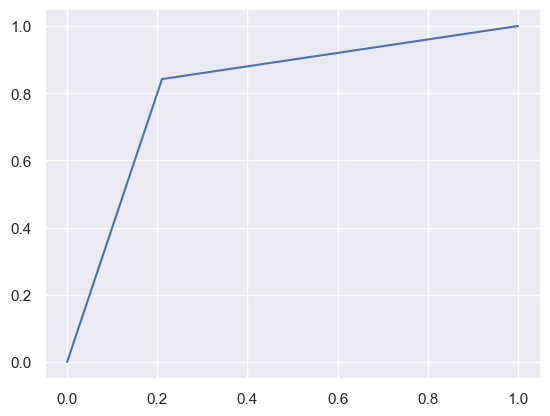

In [50]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Logistic Regression**

In [51]:
from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
logtree.fit(X_train, y_train)

LogisticRegression()

**prediction**

In [52]:
y_pred_log=logtree.predict(X_test)

**Metrices**

In [53]:
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 75.44
F1 is: 0.84
Precision is: 0.74
Recall is: 0.97


**Confusion Metrics**

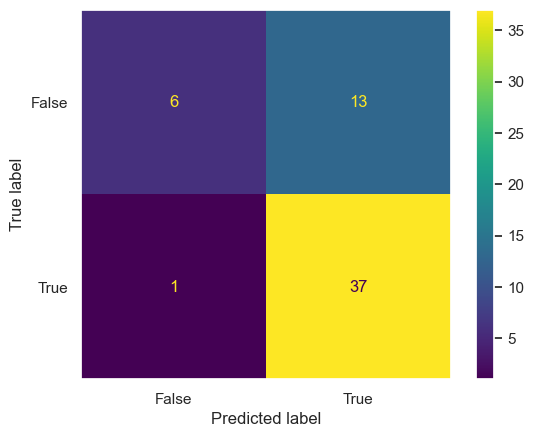

In [54]:
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [55]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 6
False postive: 13
False negative: 1
True postive: 37


**ROC-AUC Curve**

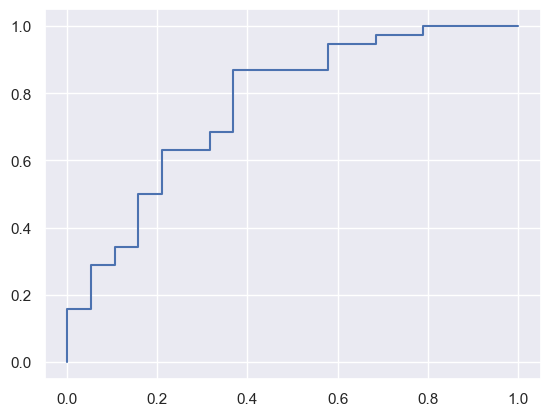

In [56]:
y_log_pred_prob=logtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Naive Bayes**

In [57]:
from sklearn.naive_bayes import GaussianNB
NBtree=GaussianNB()
NBtree.fit(X_train, y_train)

GaussianNB()

**prediction**

In [58]:
y_pred_NB=NBtree.predict(X_test)

**Metrices**

In [59]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

accuray is: 73.68
F1 is: 0.82
Precision is: 0.76
Recall is: 0.89


**Confusion Metrices**

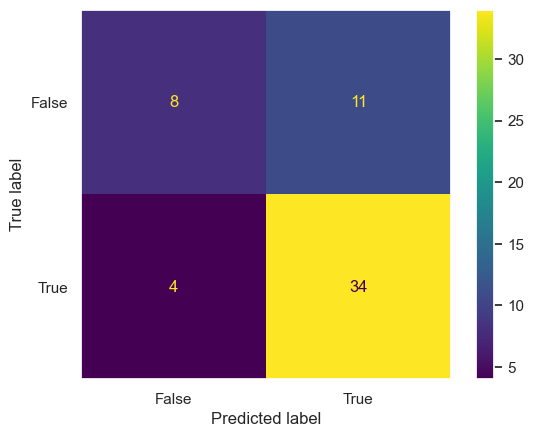

In [60]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [61]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)


True negative: 8
False postive: 11
False negative: 4
True postive: 34


**ROC-AUC Curve**

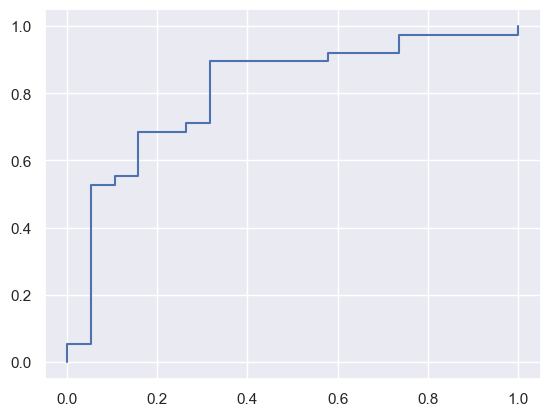

In [62]:
y_NB_pred_prob=NBtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**KNN**

In [63]:
from sklearn.neighbors import KNeighborsClassifier
KNNtree=KNeighborsClassifier()
KNNtree.fit(X_train, y_train)

KNeighborsClassifier()

**prediction**

In [64]:
y_pred_KNN=KNNtree.predict(X_test)

**Metrices**

In [65]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_KNN= round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
print("accuray is:",acc_KNN)
print("F1 is:",f1_KNN)
print("Precision is:",precision_KNN)
print("Recall is:",recall_KNN)

accuray is: 68.42
F1 is: 0.8
Precision is: 0.69
Recall is: 0.95


**Confusion Metrices**

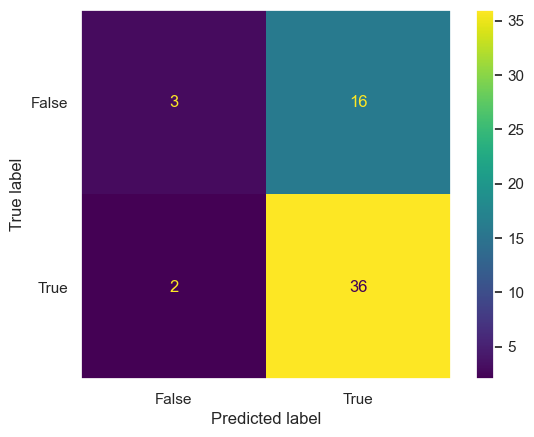

In [66]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_KNN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [67]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 3
False postive: 16
False negative: 2
True postive: 36


**ROC-AUC Curve**

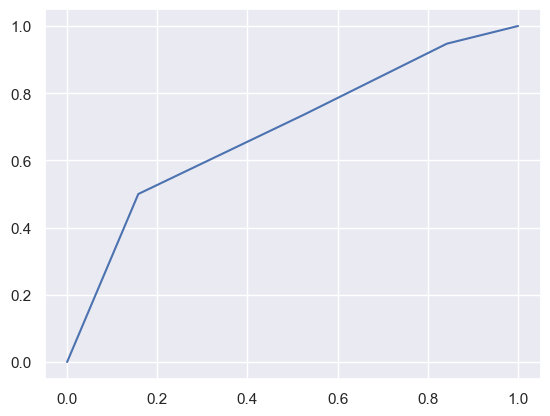

In [68]:
y_KNN_pred_prob=KNNtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Random Forest**

In [69]:
from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train, y_train)

RandomForestClassifier()

**prediction**

In [70]:
y_pred_RF=RFtree.predict(X_test)

**Metrices**

In [71]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 77.19
F1 is: 0.85
Precision is: 0.77
Recall is: 0.95


**Confusion Metrices**

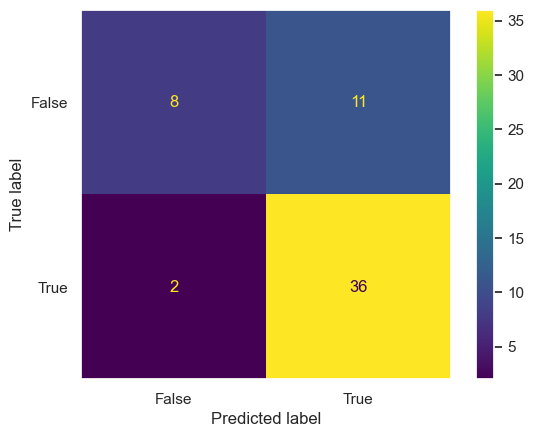

In [72]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [73]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 8
False postive: 11
False negative: 2
True postive: 36


**ROC - AUC Curve**

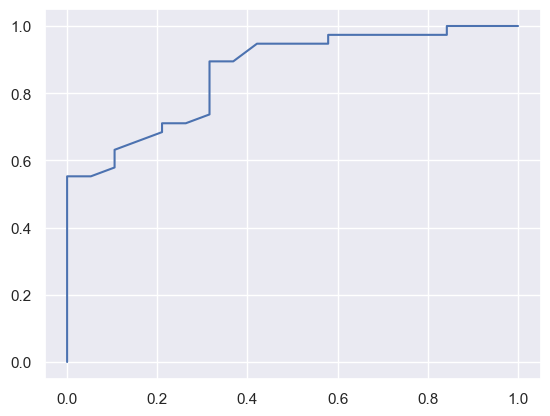

In [74]:
y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Gradient Boosting**

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

**Prediction**

In [76]:
y_pred_GB=RFtree.predict(X_test)

**Metrices**

In [77]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_GB= round(accuracy_score(y_test,y_pred_GB)*100,2)
f1_GB=round(f1_score(y_test,y_pred_GB),2)
precision_GB=round(precision_score(y_test,y_pred_GB),2)
recall_GB=round(recall_score(y_test,y_pred_GB),2)
print("accuray is:",acc_GB)
print("F1 is:",f1_GB)
print("Precision is:",precision_GB)
print("Recall is:",recall_GB)

accuray is: 77.19
F1 is: 0.85
Precision is: 0.77
Recall is: 0.95


**Confusion Mtrices**

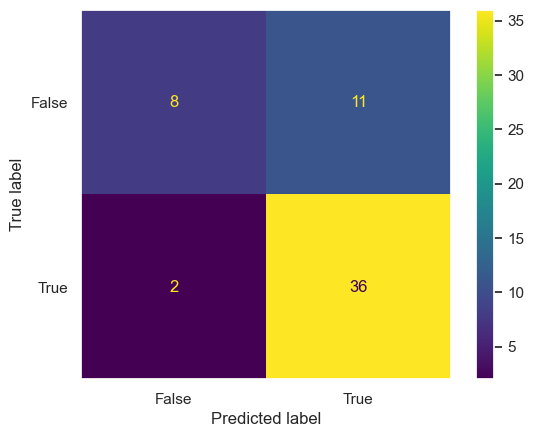

In [78]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_GB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [79]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_GB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 8
False postive: 11
False negative: 2
True postive: 36


**ROC-AUC Curve**

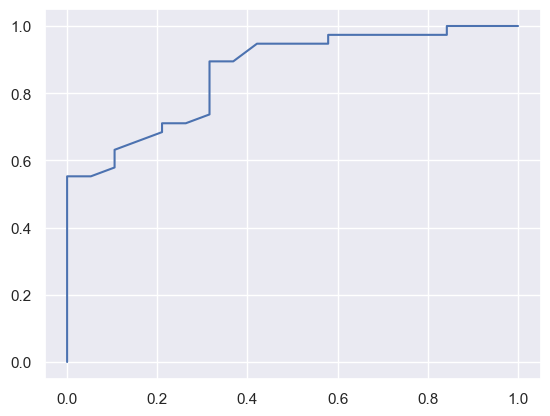

In [80]:
y_GB_pred_prob=GB.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Compare Which Model is best**

In [81]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF,acc_GB],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF,precision_GB],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF,recall_GB],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF,f1_GB]}

pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest','Gradient Boosting'])

,Accuracy,Precision,Recall,F1-score
DT,82.46,0.89,0.84,0.86
KNN,68.42,0.69,0.95,0.80
Logistic,75.44,0.74,0.97,0.84
Naive Bayes,73.68,0.76,0.89,0.82
Random Forest,77.19,0.77,0.95,0.85
Gradient Boosting,77.19,0.77,0.95,0.85


### MOdel Developement with HYperparameter

In [83]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

DecisionTreeClassifier()

In [84]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_tree=DecisionTreeClassifier()
grid_tree

DecisionTreeClassifier()

In [85]:
param_grid={
    "criterion":['gini','entropy'],
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state':[0,42]
}

In [86]:
import time
start=time.time()
grid_search=GridSearchCV(grid_tree,
                        param_grid,
                        scoring='accuracy',
                        cv=5,
                        verbose=True)

end=time.time()
print('total time taken is :',(end-start))

total time taken is : 0.0009984970092773438


In [87]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [88]:
import time
start = time.time()

grid_search.fit(X_train,y_train)

end=time.time()

print("Total time taken is:",(end-start))


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Total time taken is: 4.675773859024048


In [89]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=0)

In [90]:
grid_search.best_score_

0.8458937198067632

In [91]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 0}

**Cross validation**

In [92]:
accuracy_list=cross_val_score(grid_search.best_estimator_,
                             X_train,
                             y_train,
                             scoring='accuracy')

In [93]:
accuracy_list.mean()


0.8458937198067632

In [94]:
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

In [95]:
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)
print(classification_report(y_test,y_pred_dt))

accuray is: 82.46
F1 is: 0.86
Precision is: 0.89
Recall is: 0.84
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        19
           1       0.89      0.84      0.86        38

    accuracy                           0.82        57
   macro avg       0.80      0.82      0.81        57
weighted avg       0.83      0.82      0.83        57



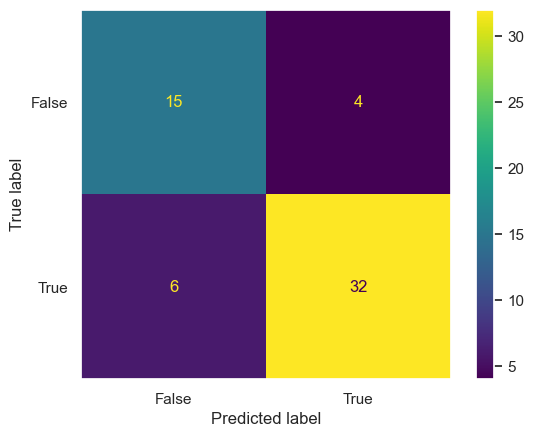

In [96]:
cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [97]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 15
False postive: 4
False negative: 6
True postive: 32


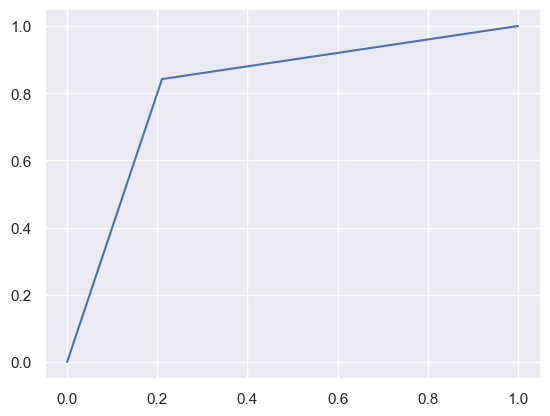

In [98]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

**Random Forest**

In [102]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()

RandomForestClassifier()

In [103]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_RF=RandomForestClassifier()   # Base model
RF_params=[keys for keys in grid_RF.get_params()]
print("avialable parameters for model:",RF_params)

avialable parameters for model: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']


In [104]:
param_grid = {
    'n_estimators': [100, 200],
    "criterion":['gini','entropy'],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

print("Processing parameters are:",param_grid)

Processing parameters are: {'n_estimators': [100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10], 'max_features': ['sqrt', 'log2', None], 'random_state': [0, 42]}


In [105]:
grid_search = GridSearchCV(grid_RF,  # Base modl
                           param_grid, # params 
                           scoring='accuracy', # metric
                           cv=5,

                           
                          verbose=True)

In [106]:
import time
start=time.time()
grid_search.fit(X_train,y_train)
end=time.time()
print("total time is",(end-start))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
total time is 120.99446177482605


In [107]:
best_params=grid_search.best_params_
best_score=grid_search.best_score_
print("best params:",best_params)
print("best train accuracy:",best_score)

best params: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'n_estimators': 100, 'random_state': 0}
best train accuracy: 0.8681159420289856


**Developing Model with best parameter**

In [108]:
from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train, y_train)

RandomForestClassifier()

In [109]:
y_pred_RF=RFtree.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)

In [111]:
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 82.46
F1 is: 0.88
Precision is: 0.8
Recall is: 0.97


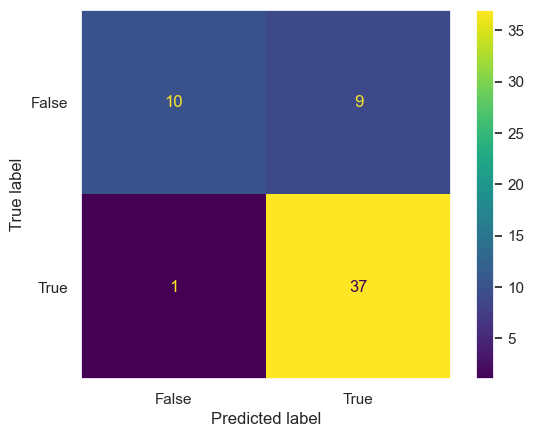

In [112]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


In [113]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 10
False postive: 9
False negative: 1
True postive: 37


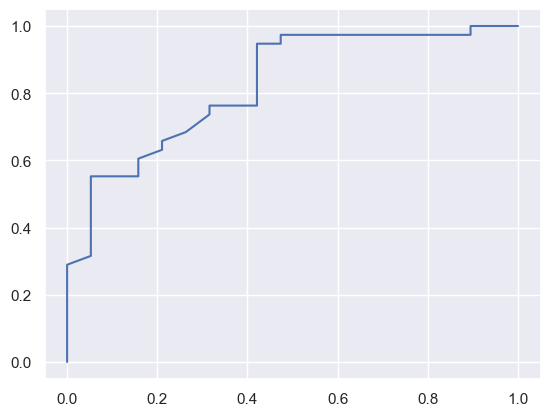

In [114]:
y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**KNN**

In [115]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_KNN=KNeighborsClassifier()   # Base model
KNN_params=[keys for keys in grid_KNN.get_params()]
print("avialable parameters for model:",KNN_params)

avialable parameters for model: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']


In [116]:
param_grid = {
              "n_neighbors":[5,6,7,10],
              "leaf_size":[20,30,40,50],
              "algorithm" :['auto', 'ball_tree', 'kd_tree', 'brute']

}

print("Processing parameters are:",param_grid)

Processing parameters are: {'n_neighbors': [5, 6, 7, 10], 'leaf_size': [20, 30, 40, 50], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}


In [117]:
grid_search = GridSearchCV(grid_KNN,  # Base modl
                           param_grid, # params 
                           scoring='accuracy', # metric
                           cv=5,
                          verbose=True)

In [118]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40, 50],
                         'n_neighbors': [5, 6, 7, 10]},
             scoring='accuracy', verbose=True)

In [119]:
best_params=grid_search.best_params_
best_score=grid_search.best_score_
print("best params:",best_params)
print("best train accuracy:",best_score)

best params: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 7}
best train accuracy: 0.7765217391304347


In [120]:
grid_search.best_index_

2

In [121]:
grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 7}

In [122]:
grid_search.best_score_

0.7765217391304347

In [123]:
grid_search.best_estimator_

KNeighborsClassifier(leaf_size=20, n_neighbors=7)

## Developing Knn Model with best Parameters

In [124]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(algorithm='auto', leaf_size= 30, n_neighbors= 12)
KN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [125]:
y_pred_KN=KN.predict(X_test)

In [126]:
acc_KN= round(accuracy_score(y_test,y_pred_KN)*100,2)
f1_KN=round(f1_score(y_test,y_pred_KN),2)
precision_KN=round(precision_score(y_test,y_pred_KN),2)
recall_KN=round(recall_score(y_test,y_pred_KN),2)

print("accuray is:",acc_KN)
print("F1 is:",f1_KN)
print("Precision is:",precision_KN)
print("Recall is:",recall_KN)
print(classification_report(y_test,y_pred_KN))

accuray is: 71.93
F1 is: 0.82
Precision is: 0.72
Recall is: 0.95
              precision    recall  f1-score   support

           0       0.71      0.26      0.38        19
           1       0.72      0.95      0.82        38

    accuracy                           0.72        57
   macro avg       0.72      0.61      0.60        57
weighted avg       0.72      0.72      0.67        57



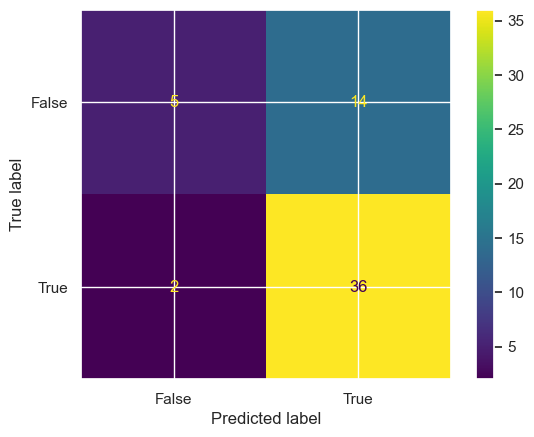

In [127]:
cmt=confusion_matrix(y_test,y_pred_KN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [128]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 5
False postive: 14
False negative: 2
True postive: 36


**ROc Curve**

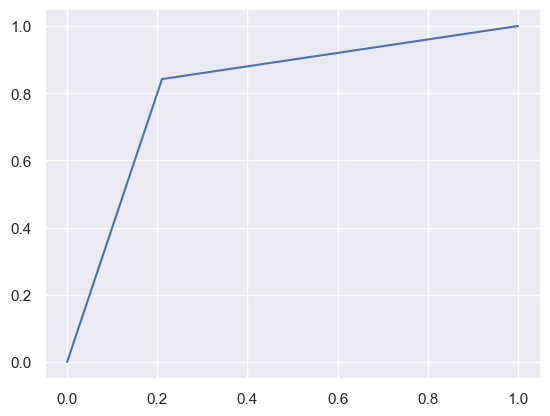

In [129]:
y_KN_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KN_pred_prob) 
plt.plot(fpr,tpr)

**Naive Bayes**

In [130]:
from sklearn.model_selection import GridSearchCV,cross_val_score
NB=GaussianNB()
NB

GaussianNB()

In [131]:
NB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [132]:
NB_params=[keys for keys in NB.get_params()]
NB_params

['priors', 'var_smoothing']

In [133]:
param_grid={
    'priors': [None, 'entropy'],
    'var_smoothing':[0.005]
}

In [134]:
grid_search = GridSearchCV(NB,  
                           param_grid, # params 
                           scoring='accuracy',
                           cv=4,
                          verbose=True) # cross validation


In [135]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


GridSearchCV(cv=4, estimator=GaussianNB(),
             param_grid={'priors': [None, 'entropy'], 'var_smoothing': [0.005]},
             scoring='accuracy', verbose=True)

In [136]:
grid_search.best_index_

0

In [137]:
grid_search.best_params_

{'priors': None, 'var_smoothing': 0.005}

In [138]:
grid_search.best_score_

0.7850877192982455

In [139]:
grid_search.best_estimator_

GaussianNB(var_smoothing=0.005)

## Developing Model with best parameter**

In [140]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB(priors=None, var_smoothing= 0.005)
NB.fit(X_train,y_train)

GaussianNB(var_smoothing=0.005)

In [141]:
y_pred_NB=NB.predict(X_test)

In [142]:
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)

print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)
print(classification_report(y_test,y_pred_NB))

accuray is: 66.67
F1 is: 0.8
Precision is: 0.67
Recall is: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.67      1.00      0.80        38

    accuracy                           0.67        57
   macro avg       0.33      0.50      0.40        57
weighted avg       0.44      0.67      0.53        57



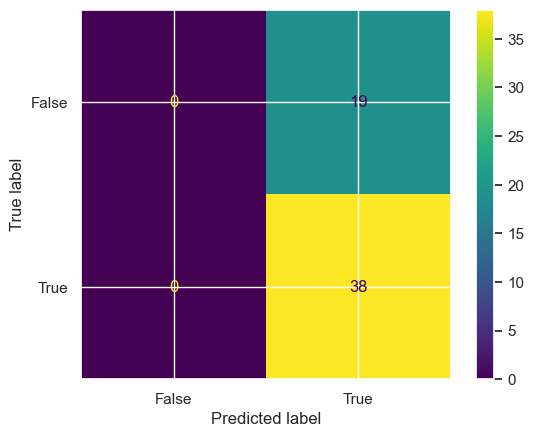

In [143]:
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [144]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 0
False postive: 19
False negative: 0
True postive: 38


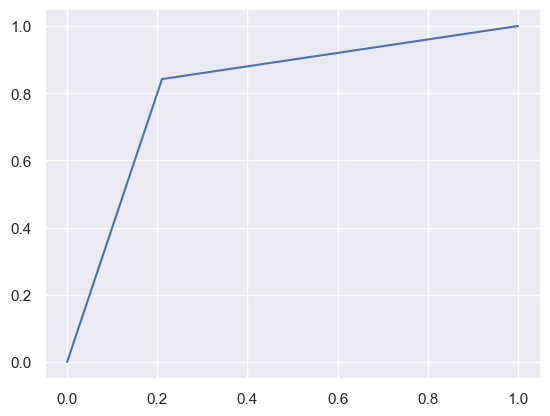

In [145]:
y_NB_pred_prob=dtree.predict_proba(X_test)[:,1]   
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

**Logistic Regression**

In [146]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_log=LogisticRegression()
grid_log

LogisticRegression()

In [147]:
log_params=[keys for keys in grid_log.get_params()]
log_params

['C',
 'class_weight',
 'dual',
 'fit_intercept',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'random_state',
 'solver',
 'tol',
 'verbose',
 'warm_start']

In [148]:
grid_log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [149]:
log_grid={
    'C':[1.0,'entropy'],
    'intercept_scaling':[4,6,7,8,9,10],
    'fit_intercept':[True],
    'warm_start':[False],
    'max_iter':[0,42]
         
}


In [150]:
grid_search = GridSearchCV(grid_log,  # Base modl
                           log_grid, # params 
                           scoring='accuracy', # metric
                           cv=4,
                          verbose=True)

In [151]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 'entropy'], 'fit_intercept': [True],
                         'intercept_scaling': [4, 6, 7, 8, 9, 10],
                         'max_iter': [0, 42], 'warm_start': [False]},
             scoring='accuracy', verbose=True)

In [152]:
grid_search.best_index_

0

In [153]:
grid_search.best_params_

{'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 4,
 'max_iter': 0,
 'warm_start': False}

In [154]:
grid_search.best_score_

0.7850877192982455

In [155]:
grid_search.best_estimator_

LogisticRegression(intercept_scaling=4, max_iter=0)

**Developing Logistic With best parameters**

In [157]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C= 1.0,
                       fit_intercept= True,
                       intercept_scaling= 4,
                       max_iter=42,
                       warm_start= False)
log.fit(X_train,y_train)

LogisticRegression(intercept_scaling=4, max_iter=42)

In [158]:
y_pred_log=log.predict(X_test)

In [159]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)

In [160]:
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 63.16
F1 is: 0.77
Precision is: 0.65
Recall is: 0.95


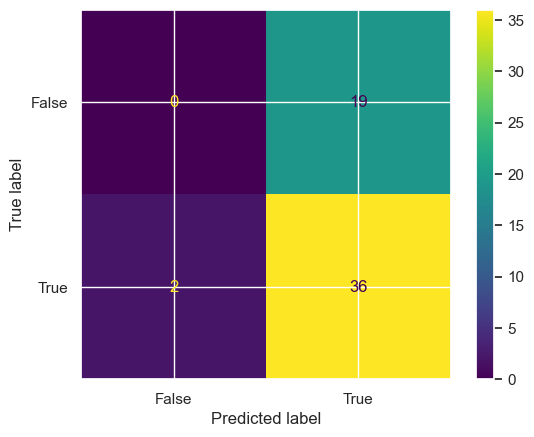

In [161]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [162]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 0
False postive: 19
False negative: 2
True postive: 36


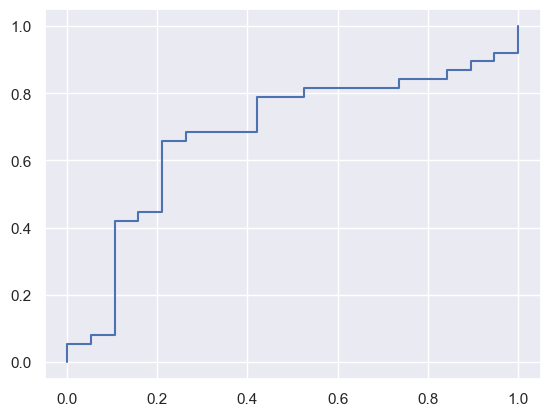

In [163]:
y_log_pred_prob=log.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [164]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF],
    "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF]}

pd.DataFrame(dict1,index=['Decision Tree','K nearest Neighbour','Logistic Regression ','Naive Bayes','Random Forest'])

,Accuracy,Precision,Recall,F1-score
Decision Tree,82.46,0.89,0.84,0.86
K nearest Neighbour,68.42,0.69,0.95,0.80
Logistic Regression,63.16,0.65,0.95,0.77
Naive Bayes,66.67,0.67,1.00,0.80
Random Forest,82.46,0.80,0.97,0.88
